# Merged Clustering


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Circle
from itertools import combinations
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
sns.set_style("whitegrid")


In [ ]:
file_path = '/combined_COVID19_dataset.xlsx' 
# Read the specific sheet from the Excel file
dataset = pd.read_excel(file_path)
dataset.head()
# Remove 'Subject_ID' from the dataset
dataset = dataset.drop(columns=['Subject_ID'])
# Find and drop rows where 'Outcome_numerical' is 3
dataset = dataset[dataset['Outcome_numerical'] != 3]

In [4]:
# Check the remaining shape and missing values
cleaned_shape = dataset.shape
remaining_missing_values = dataset.isnull().sum().max()  # Max missing values in any column
cleaned_shape, remaining_missing_values


((612, 167), 0)

In [5]:
# Counting each category
cluster_counts = dataset['Outcome_numerical'].value_counts()
cluster_counts

1    415
4    124
2     55
5     18
Name: Outcome_numerical, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# File path to the Excel file
file_path = '/combined_COVID19_dataset.xlsx' 


# Read the specific sheet from the Excel file
dataset = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
print(dataset.head())

# Remove 'Subject_ID' from the dataset as it's not needed for clustering
dataset = dataset.drop(columns=['Subject_ID'])

# Find and drop rows where 'Outcome_numerical' is 3 (not needed for this analysis)
dataset = dataset[dataset['Outcome_numerical'] != 3]

# Check the remaining shape and max number of missing values in any column
cleaned_shape = dataset.shape
remaining_missing_values = dataset.isnull().sum().max()
print(f"Cleaned shape: {cleaned_shape}, Remaining missing values: {remaining_missing_values}")

# Set the style for Seaborn plots
sns.set_style("whitegrid")


   Subject_ID  AGE  GENDER   LOS  DAYS OF SYMPTOMS  INTUBATION  \
0           1   66       1  15.0               6.0           0   
1           2   52       2  12.0               4.0           0   
2           3   63       1  13.0               6.0           0   
3           4   55       1  11.0              10.0           0   
4           5   72       1  19.0               4.0           0   

   tINTUBATION_cleaned  CPAP  tCPAP  HIGH FLOW  ...  Medication_ciproxin  \
0                  0.0     0    0.0          0  ...                    0   
1                  0.0     0    0.0          0  ...                    0   
2                  0.0     0    0.0          0  ...                    0   
3                  0.0     0    0.0          0  ...                    0   
4                  0.0     0    0.0          0  ...                    0   

   REMDESIVIR_Processed  TAMIFLU_Processed  KALETRA_Processed  \
0                     0                  1                  1   
1               

In [7]:
# Features to be used for clustering, excluding 'Outcome_numerical'
features_to_cluster = dataset.columns.tolist()
features_to_cluster.remove('Outcome_numerical')

# Filter the dataset to include only Class 1 (Original Discharged) patients
discharged_patients = dataset[dataset['Outcome_numerical'] == 1]

# Fill missing values with 1 and select features for clustering
X = discharged_patients[features_to_cluster].fillna(1)

# Standardize the features (mean=0, variance=1) for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering to the standardized data with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Convert the cluster labels to strings for easier plotting
str_labels = np.array([str(label) for label in labels])

# Verify the distribution of new clusters
print("Distribution of new clusters (0 and 1) in Non-Severe patients:", np.unique(labels, return_counts=True))

# Map new clusters to 'Severe' (0) and 'Non-Severe' (1)
discharged_patients['Cluster'] = labels
discharged_patients['Outcome_numerical'] = discharged_patients['Cluster'].map({0: 0, 1: 1})

# Update the original dataset with these new labels
dataset.loc[discharged_patients.index, 'Outcome_numerical'] = discharged_patients['Outcome_numerical']

# Save the centroids of the clusters for future use
centroids = kmeans.cluster_centers_

# Count the outcome categories in the dataset to keep track of the results
cluster_counts = dataset['Outcome_numerical'].value_counts()
print(cluster_counts)


Distribution of new clusters (0 and 1) in Non-Severe patients: (array([0, 1], dtype=int32), array([142, 273]))
1    273
0    142
4    124
2     55
5     18
Name: Outcome_numerical, dtype: int64


/Users/michael/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/dj/sx7b12451lzfs9p_v72xnsv40000gn/T/ipykernel_87344/761866903.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discharged_patients['Cluster'] = labels
/var/folders/dj/sx7b12451lzfs9p_v72xnsv40000gn/T/ipykernel_87344/761866903.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

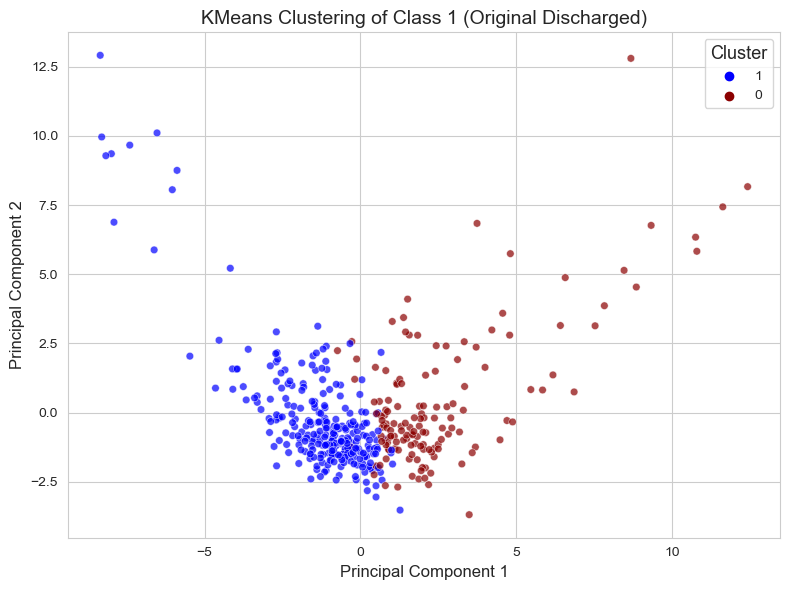

1    273
0    142
4    124
2     55
5     18
Name: Outcome_numerical, dtype: int64


In [8]:
# Apply PCA to reduce dimensionality to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting with PCA components and cluster labels
pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = str_labels

# Plot the PCA components with clusters
plt.figure(figsize=(8, 6))
custom_palette = {'0': '#8B0000', '1': '#0000FF'}  # Dark red for cluster 0, blue for cluster 1

sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster',
                data=pca_df, palette=custom_palette, alpha=0.7, legend='brief', s=30)
plt.title('KMeans Clustering of Class 1 (Original Discharged)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize='13', loc='upper right')
plt.tight_layout()
plt.show()

# Save the centroids of the clusters for future use
centroids = kmeans.cluster_centers_

# Count the outcome categories in the dataset to keep track of the results
cluster_counts = dataset['Outcome_numerical'].value_counts()
print(cluster_counts)


In [9]:
# Map new clusters back to the original dataset
cluster_mapping = {0: 'Severe', 1: 'Non-Severe'}
discharged_patients['Cluster'] = labels
discharged_patients['Outcome_numerical'] = discharged_patients['Cluster'].map(cluster_mapping).map({'Severe': 0, 'Non-Severe': 1})

# Filter the dataset to include only Class 4 (Omicron Discharged) patients
class_4_patients = dataset[dataset['Outcome_numerical'] == 4]
X_class_4 = class_4_patients[features_to_cluster].fillna(1)

# Standardize the features for Class 4
X_class_4_scaled = scaler.transform(X_class_4)

# Calculate distances to centroids
def calculate_distance_to_centroids(data_point, centroids):
    distances = np.linalg.norm(centroids - data_point, axis=1)
    return distances

class_4_patients['Distances'] = list(map(lambda x: calculate_distance_to_centroids(x, centroids), X_class_4_scaled))

# Assign new clusters based on proximity to centroids
def assign_new_cluster(distances):
    return 1 if distances[1] < distances[0] else 0

class_4_patients['New_Cluster'] = class_4_patients['Distances'].apply(assign_new_cluster)
class_4_patients['Outcome_numerical'] = class_4_patients['New_Cluster']

# Check the distribution of new clusters
print("Distribution of clusters for Class 4 (Omicron Discharged):", class_4_patients['Outcome_numerical'].value_counts())

# Update the original dataset with new labels for Class 4
dataset.loc[class_4_patients.index, 'Outcome_numerical'] = class_4_patients['Outcome_numerical']

# Count the outcome categories in the dataset to keep track of the results
cluster_counts = dataset['Outcome_numerical'].value_counts()
print(cluster_counts)


Distribution of clusters for Class 4 (Omicron Discharged): 1    72
0    52
Name: Outcome_numerical, dtype: int64
1    345
0    194
2     55
5     18
Name: Outcome_numerical, dtype: int64


/var/folders/dj/sx7b12451lzfs9p_v72xnsv40000gn/T/ipykernel_87344/2166597384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discharged_patients['Cluster'] = labels
/var/folders/dj/sx7b12451lzfs9p_v72xnsv40000gn/T/ipykernel_87344/2166597384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discharged_patients['Outcome_numerical'] = discharged_patients['Cluster'].map(cluster_mapping).map({'Severe': 0, 'Non-Severe': 1})
/var/folders/dj/sx7b12451lzfs9p_v72xnsv40000gn/T/ipykernel_87344/2166597384.py:18: Se

In [116]:
# Map 2 and 5 to 2 (Deceased)
dataset.loc[dataset['Outcome_numerical'] == 5, 'Outcome_numerical'] = 2

# Count the outcome categories in the dataset to keep track of the results
cluster_counts = dataset['Outcome_numerical'].value_counts()
print(cluster_counts)


1    345
0    194
2     73
Name: Outcome_numerical, dtype: int64


In [117]:
# Standardize the features for the entire dataset
U = dataset[features_to_cluster].fillna(1)
U_scaled = scaler.fit_transform(U)

# Apply PCA to the entire dataset
principalComponents = pca.fit_transform(U_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Combine with updated cluster labels
principalDf['Cluster'] = dataset['Outcome_numerical'].values

# Map the numerical clusters back to descriptive names
cluster_mapping_final = {
    0: 'Severe',
    1: 'Non-Severe',
    2: 'Deceased'
}
principalDf['Cluster'] = principalDf['Cluster'].map(cluster_mapping_final)

# Check the distribution of the final clusters
print("Distribution of final clusters in the dataset:", principalDf['Cluster'].value_counts())


Distribution of final clusters in the dataset: Non-Severe    345
Severe        194
Deceased       73
Name: Cluster, dtype: int64


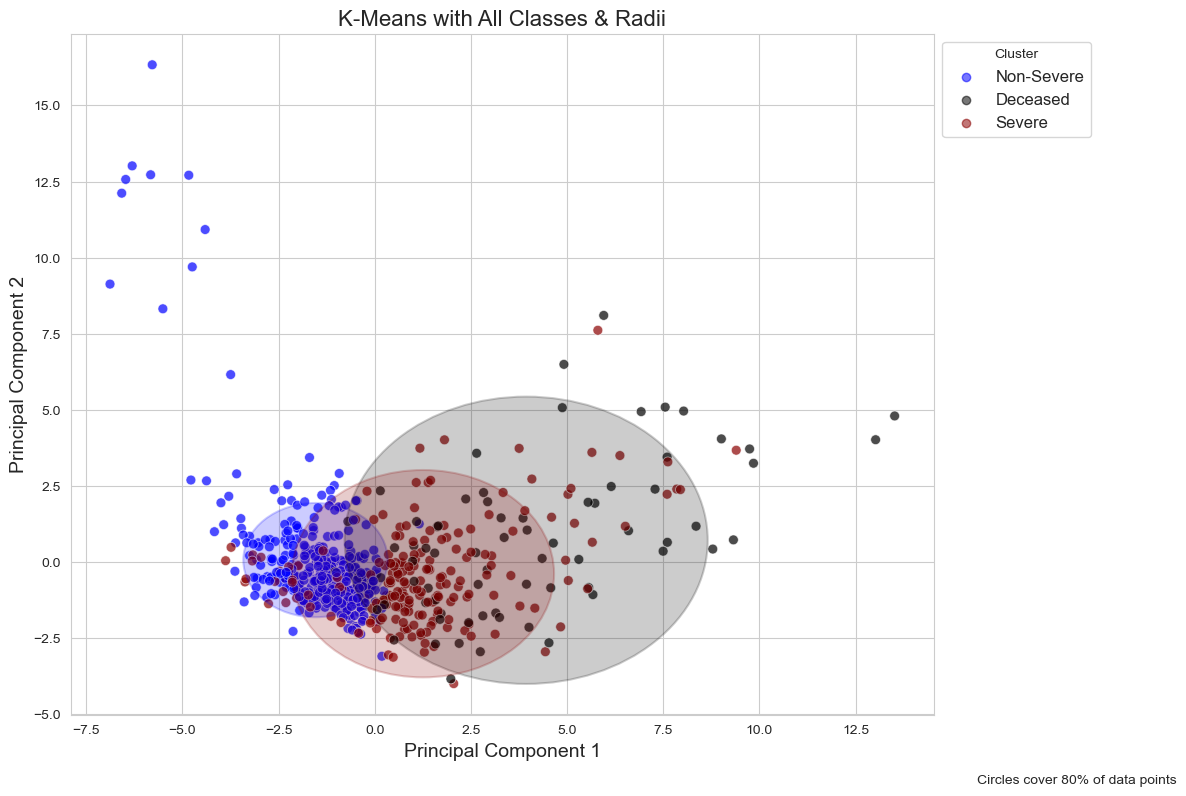

In [ ]:
# Define faded colors for each cluster label
fade_colors = {
    'Severe': '#8B000088',      # Dark Red
    'Non-Severe': '#0000FF88',  # Blue
    'Deceased': '#00000088'     # Black
}

# Initialize the plot with adjusted size
plt.figure(figsize=(12, 8))

# Draw the scatter plot first to control axes limits later
ax = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster',
                     data=principalDf, palette=fade_colors, alpha=0.7, s=50)

# Calculate and draw circles with the fade color for each cluster
for cluster in principalDf['Cluster'].unique():
    cluster_data = principalDf[principalDf['Cluster'] == cluster]
    if len(cluster_data) > 0:  # Ensure there are data points in the cluster
        centroid = cluster_data[['Principal Component 1', 'Principal Component 2']].mean()
        distances = np.sqrt((cluster_data['Principal Component 1'] - centroid[0])**2 + 
                            (cluster_data['Principal Component 2'] - centroid[1])**2)
        if len(distances) > 0:  # Ensure there are distances to calculate radius
            radius = np.percentile(distances, 80)  # Adjusting the radius to the 80th percentile

            # Draw a circle around the cluster
            circle = Circle((centroid[0], centroid[1]), radius, color=fade_colors[cluster], fill=True, alpha=0.2, linewidth=1.5)
            ax.add_patch(circle)
    
# Enhancing the plot
plt.title('K-Means with All Classes & Radii', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Adjust legend inside the plot for clarity and add the note about 80% coverage
legend = plt.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.text(1.05, -0.1, 'Circles cover 80% of data points', transform=ax.transAxes, fontsize=10)  # Note below the legend

# Display the plot with adjusted layout
plt.tight_layout()  # Adjust the layout
plt.show()


In [ ]:
# Save the dataset to a CSV file
output_file_path_csv = '/Clustered_Unvacced_labeled.xlsx'
dataset.to_excel(output_file_path_csv, index=False)

output_file_path_csv